#### Name- Aditya Mohan
#### CT No.- CT20192728704 
#### College Name- Jaypee University of Information Technology

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import BaggingRegressor

In [2]:
data=pd.read_csv("Power-Networks-LCL.csv")
data.head()

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0.0,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0.0,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0.0,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0.0,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0.0,ACORN-A,Affluent


In [3]:
data.index=pd.DatetimeIndex(data['DateTime']).date

In [4]:
data['LCLid'].value_counts()[:3] #Top 3 households with most samples

MAC000018    39081
MAC000021    39078
MAC000020    39078
Name: LCLid, dtype: int64

In [94]:
def data_prep(data1):
    data1['date']=pd.DatetimeIndex(data1['DateTime']).date    #Extracting the date
    data1['Hour']=pd.DatetimeIndex(data1['DateTime']).hour    #Extracting the hour
    data1.drop(columns={'DateTime'},axis=1,inplace=True)
    data1.drop(columns={'stdorToU'},axis=1,inplace=True)   #Dropping stdorToU as it remains constant for all 3 households.
    kwh=np.array(data1['KWh'])  
    for i in range(len(kwh)-1):           #Convert half-hourly kwh values to hourly values
        if(i%2==0):
            kwh[i+1]+=kwh[i]

    data1['KWh']=kwh
    data1=data1.iloc[1::2]
    data1['Day']=pd.DatetimeIndex(data1['date']).day           #Extracting the day
    data1['Month']=pd.DatetimeIndex(data1['date']).month       #Extracting the month
    data1['Year']=pd.DatetimeIndex(data1['date']).year         #Extracting the month
    data1.drop(columns={'date'},axis=1,inplace=True)
    data1['KWh']=np.log(data1['KWh'])                          #normalising the data and removing outliers
    q1=data1['KWh'].quantile(0.25)
    q3=data1['KWh'].quantile(0.75)
    iqr=q3-q1
    ll=q1-(1.5*iqr)
    ul=q3+(1.5*iqr)
    data1=data1[((data1['KWh']>ll) & (data1['KWh']<ul))]
    return data1

In [95]:
data0=data[data.LCLid=='MAC000018']
data0=data_prep(data0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

In [96]:
data2=data[data.LCLid=='MAC000020']
data2=data_prep(data2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [97]:
data3=data[data.LCLid=='MAC000021']
data3=data_prep(data3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [98]:
data4=data0.append(data2.append(data3,ignore_index=True),ignore_index=True)

In [99]:
data4.head()

,LCLid,KWh,Acorn,Acorn_grouped,Hour,Day,Month,Year
0,MAC000018,-0.687165,ACORN-E,Affluent,10,7,12,2011
1,MAC000018,-0.850971,ACORN-E,Affluent,11,7,12,2011
2,MAC000018,-0.802962,ACORN-E,Affluent,12,7,12,2011
3,MAC000018,0.352064,ACORN-E,Affluent,13,7,12,2011
4,MAC000018,-0.460449,ACORN-E,Affluent,14,7,12,2011


In [100]:
data4=data4.join(pd.get_dummies(data4['Acorn_grouped']))    #Creating dummy variables for categorical features.
data4=data4.join(pd.get_dummies(data4['Acorn']))
data4=data4.join(pd.get_dummies(data4['LCLid']))
data4.drop(columns={'Acorn','Acorn_grouped','LCLid'},axis=1,inplace=True)

In [111]:
data4.head()

,KWh,Hour,Day,Month,Year,Affluent,Comfortable,ACORN-E,ACORN-J,MAC000018,MAC000020,MAC000021
0,-0.687165,10,7,12,2011,1,0,1,0,1,0,0
1,-0.850971,11,7,12,2011,1,0,1,0,1,0,0
2,-0.802962,12,7,12,2011,1,0,1,0,1,0,0
3,0.352064,13,7,12,2011,1,0,1,0,1,0,0
4,-0.460449,14,7,12,2011,1,0,1,0,1,0,0


### Predictive Modelling

In [101]:
X_train, X_test, y_train, y_test= train_test_split(data4.drop(columns={'KWh'},axis=1),data4['KWh'],test_size=0.2,random_state=0)

In [113]:
model = RandomForestRegressor(n_estimators=100,n_jobs=-1)
X, y = X_train, y_train

model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [114]:
y_pred=model.predict(X_test)    #Predicting KWh for houses

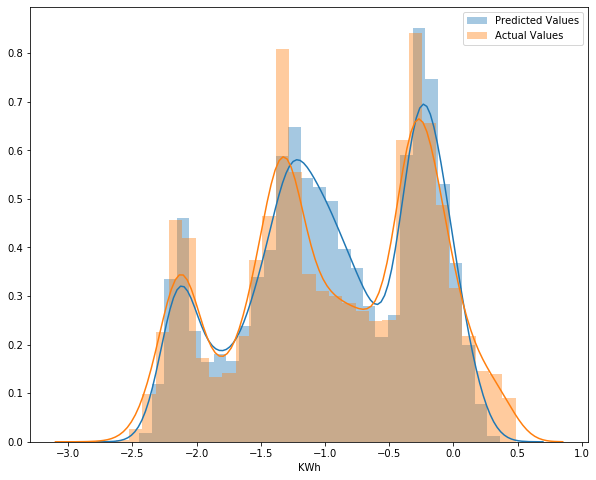

In [115]:
plt.figure(figsize=(10,8))
sns.distplot(y_pred,label='Predicted Values')
sns.distplot(y_test,label='Actual Values')     #Comparing Logged Predicted values with Logged Actual Values
plt.legend()

In [117]:
print("RMSE:{}".format(np.mean((y_pred-y_test)**2)**0.5))

RMSE:0.323711429748544


In [118]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('MAE: %f' % mae)

MAE: 0.214593
